In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import shutil
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook as tqdm

from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import TransformerModel, ExponentialSmoothing
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

In [3]:
import os
# C:/Python_Project/Project_1
os.chdir("C:/Python_Project/Project_1")
all_data = pd.read_csv("all_data.csv")
all_data["Datetime"] = pd.to_datetime(all_data["Datetime"])
all_data_sort=all_data.sort_values(by='Datetime')
# print(all_data)
# print(all_data_sort)
# print(all_data.dtypes)

In [4]:
df = all_data_sort[["Datetime","AEP_MW"]]
df = df.set_index('Datetime')
df = df[~df.index.duplicated()]
series = TimeSeries.from_dataframe(df,fill_missing_dates=True,fillna_value=df["AEP_MW"].mean())

In [5]:
# Create training and validation sets:
train, val = series.split_after(pd.Timestamp("20180501"))

# Normalize the time series (note: we avoid fitting the transformer on the validation set)
# Change name
scaler = Scaler()
train_scaled = scaler.fit_transform(train)
val_scaled = scaler.transform(val)
series_scaled = scaler.transform(series)

In [6]:
# val_scaled

In [7]:
"the 'AEP_MW' dataset has {} data points".format(len(series))

"the 'AEP_MW' dataset has 121296 data points"

In [8]:
my_model = TransformerModel(
    input_chunk_length=25,
    output_chunk_length=24,
#   batch_size=8760,
#   n_epochs=200,
    n_epochs=5,
#   model_name="air_transformer",
    nr_epochs_val_period=10,
    d_model=16,
    nhead=8,
    num_encoder_layers=2,
    num_decoder_layers=2,
    dim_feedforward=128,
    dropout=0.1,
    activation="relu",
    random_state=42,
    force_reset=True,
    pl_trainer_kwargs={"accelerator": "gpu", "gpus": -1, "auto_select_gpus": True}
)

In [9]:
my_model.fit(series=train_scaled, val_series=val_scaled, verbose=True)
my_model.save_model("C:/Users/linyu/Desktop/python notebook/trained_model/trans_power.pth.tar")

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

In [10]:
model_loaded = TransformerModel.load_model("C:/Users/linyu/Desktop/python notebook/trained_model/trans_power.pth.tar")
backtest_series = my_model.historical_forecasts(
    series=series_scaled,
    start=pd.Timestamp("20180424"),
    forecast_horizon=6,
    retrain=False,
    verbose=True,
)

  0%|          | 0/2420 [00:00<?, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

Predicting: 3719it [00:00, ?it/s]

MAPE: 3.53%


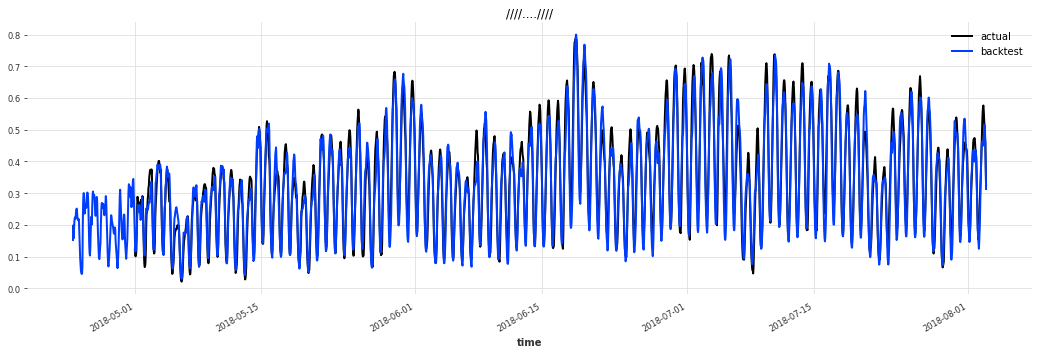

In [11]:
plt.figure(figsize=(18, 5))
series_scaled[119040:].plot(label="actual", lw=2)
backtest_series.plot(label="backtest", lw=2)
plt.legend()

print(
    "MAPE: {:.2f}%".format(
        mape(
            scaler.inverse_transform(series_scaled),
            scaler.inverse_transform(backtest_series),
        )
    )
)

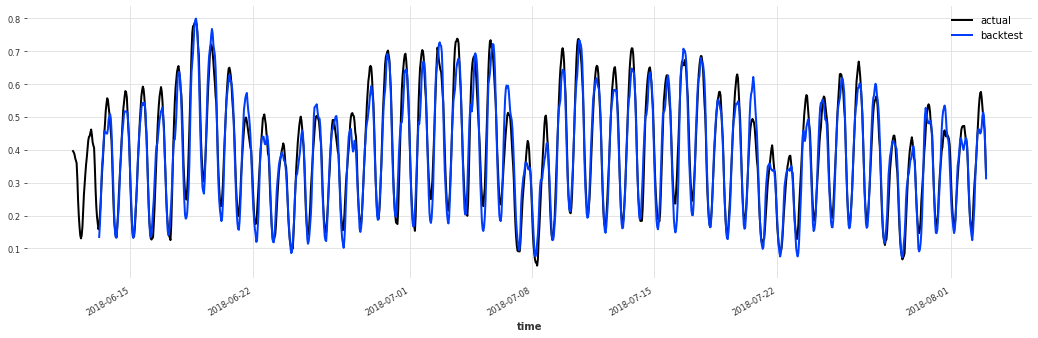

In [19]:
plt.figure(figsize=(18, 5))
series_scaled[120040:].plot(label="actual", lw=2)
backtest_series[1200:].plot(label="backtest", lw=2)
plt.legend()

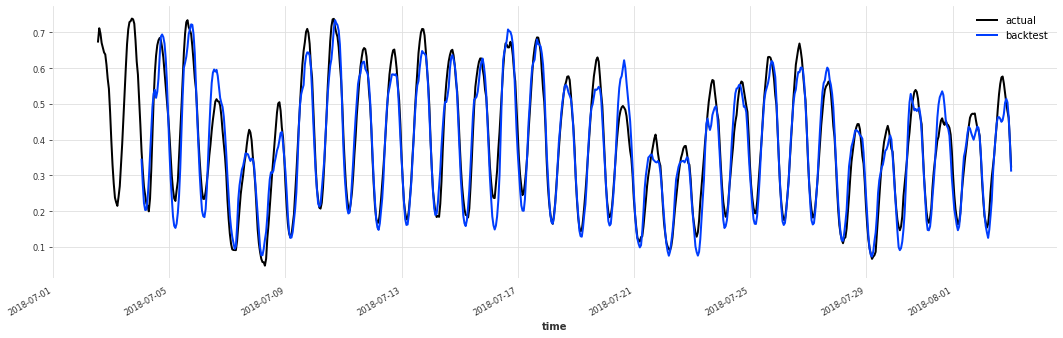

In [17]:
plt.figure(figsize=(18, 5))
series_scaled[120540:].plot(label="actual", lw=2)
backtest_series[1700:].plot(label="backtest", lw=2)
plt.legend()

In [12]:
from darts.metrics import mape, rmse, r2_score

def accuracy_metrics(pred, act):
    act2 = act.slice_intersect(pred)
    pred2 = pred.slice_intersect(act2)
    resid = pred2 - act2
    sr = resid.pd_series()
    sa = act2.pd_series()
    sp = pred2.pd_series()
    res_mape = mape(pred2, act2)
    res_r2 = r2_score(pred2, act2)
    res_rmse = rmse(pred2, act2)
    res_pe = sr / sa
    n_act = len(act2)
    res_rmspe = np.sqrt(np.sum(res_pe**2) / n_act)     # root mean square percentage error
    res_std = np.std(sr)                               # std error of the model = std deviation of the noise
    res_se = res_std / np.sqrt(n_act)                  # std error in estimating the mean
    res_sefc = np.sqrt(res_std + res_se**2)            # std error of the forecast
    
    res_accuracy = {
        "MAPE":res_mape,"RMSPE":res_rmspe, "RMSE":res_rmse, 
        "-R squared":-res_r2}
    return res_accuracy

In [13]:
accuracy_metrics(backtest_series, series_scaled) 

{'MAPE': 12.204872598645272,
 'RMSPE': 0.197921355209757,
 'RMSE': 0.04283732078957175,
 '-R squared': -0.9284357427594182}